# Option Types
Calls: The right, but not obligation to buy the "Underlying" at a predetermined price, the "Strike". 

Puts: The right to sell the "Underlying" at the "Strike" of the option. 

You pay a "premium" so your counterparty will give you this privilege.

This privilege is time limited; options have fixed lifetimes 

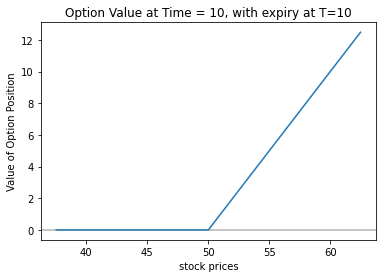

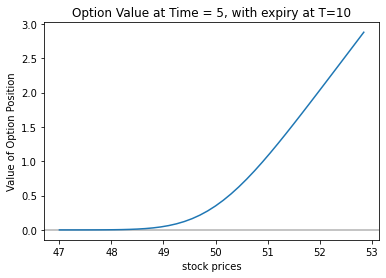

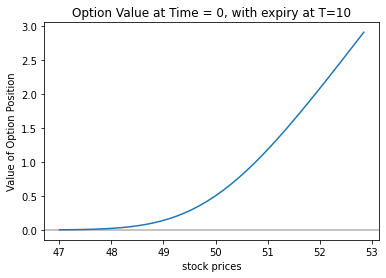

The Greeks
{'Delta': 0.9567570228060056,
 'Gamma': 0.00644567479711804,
 'Rho': 0.047671691833639396,
 'Theta': -0.06450222913163346,
 'Vega': 0.1509404739333614}


In [7]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt
from matplotlib import animation
import random 
from pprint import pprint      
import contextlib 
from IPython import get_ipython
import os

is_jupyter = True
if is_jupyter:
    ipython = get_ipython()
    script_dir = %pwd
    file_path = os.path.abspath(os.path.join(script_dir, '..\option_classes.ipynb'))
    ipython.magic(f"run {file_path}")
else:
    #deal with google drive or desktops
    import IPython.core.ipapi  
    ipython = IPython.core.ipapi.get()
    ipython.magic(f"run {class_path}") 

#Calls
# risk_free = 0.05
stock = Stock(price0 = 52, exp_vol = 0.12, dividend =0, const =True)
call1 = Euro_Option(strike = 50, premium = 0, lifetime = 10, tp = 'call', asset = stock)
a = call1.make_payoff(position= 'long', t= call1.lifetime, scale = 'auto')
plt.show()
a = call1.make_payoff(position= 'long', t= call1.lifetime//2, scale = 3)
plt.show()
a = call1.make_payoff(position= 'long', scale = 3)
plt.show()
print("The Greeks")
pprint(call1.calc_greeks(days_elapsed = 0))
# print(call1.asset.true_prices)


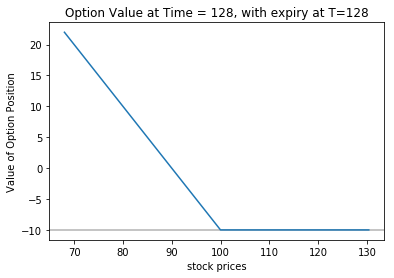

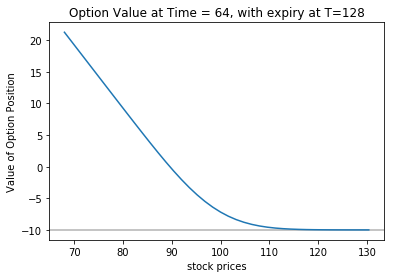

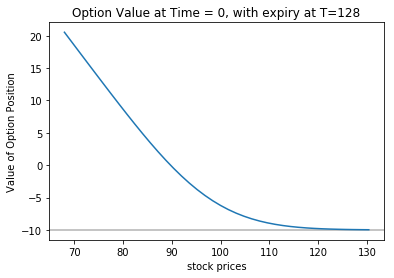

The Greeks:
{'Delta': -0.4933992398068713,
 'Gamma': 0.03988876722146049,
 'Rho': -0.00497330952894672,
 'Theta': -0.24755799443827825,
 'Vega': 0.39888767221460486}


In [3]:
#Puts
put1 = Euro_Option(strike = 100, premium = 10, lifetime = 128, tp = 'put')
put1.make_payoff(position= 'long', t= put1.lifetime, scale= 'auto')
plt.show()
put1.make_payoff(position= 'long', t= put1.lifetime//2, scale= 'auto')
plt.show()
put1.make_payoff(position= 'long', scale= 'auto')
plt.show()
print("The Greeks:")
pprint(put1.calc_greeks(days_elapsed = 127))

# Practice Identifying 
Puts vs. Calls, Being Long vs. Short, and the Option's Strike and Premium

50 3.4237268457909913


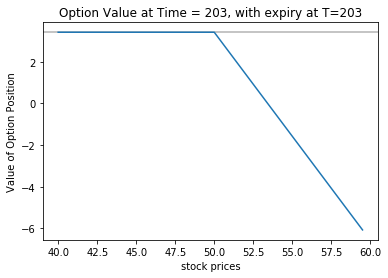

stop?n
{'asset': <__main__.Stock object at 0x000001BE57923C18>,
 'lifetime': 203,
 'premium': 3.4237268457909913,
 'strike': 50,
 'tp': 'call'}
50 4.372511216943755


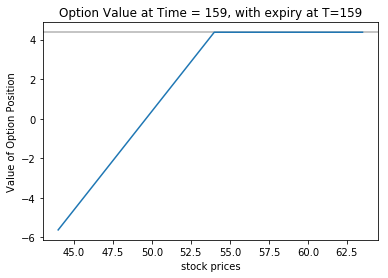

stop?n
{'asset': <__main__.Stock object at 0x000001BE57BEED30>,
 'lifetime': 159,
 'premium': 4.372511216943755,
 'strike': 54,
 'tp': 'put'}
50 4.915798331081438


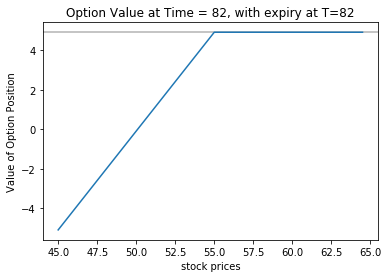

stop?y
{'asset': <__main__.Stock object at 0x000001BE57E5BDD8>,
 'lifetime': 82,
 'premium': 4.915798331081438,
 'strike': 55,
 'tp': 'put'}


In [32]:
# Euro_Option.rep_option(long_short = False, at_maturity= True)#Just put vs. call; identify strike, premium
Euro_Option.rep_option(at_maturity = True)#Add Long vs. short Position, Grib!!
# #Add Long vs. short time to expiry/low vs. high implied vol, by commenting out line 180
# Euro_Option.rep_option()

# Greeks
Options sensitive to multiple things. The 'greeks' represent how the option price will react to small changes in these values

Delta: The change in the option's price with a 1$ increase in underlying. First derivative of price.

Gamma: The increase in Delta as the underlying increases. Second derivative of price, always positive.

Vega: Change in the value of the Option with a change in the implied Volatility.

Theta: Change in the Option's price with Time. Always negative.

Rho: Option's value sensitivity to interest rates. (Positive for Calls, Negative for Puts) 

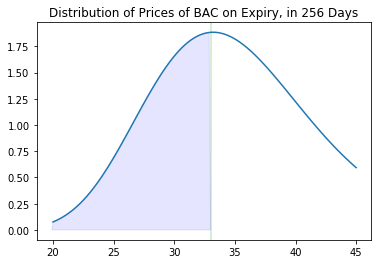

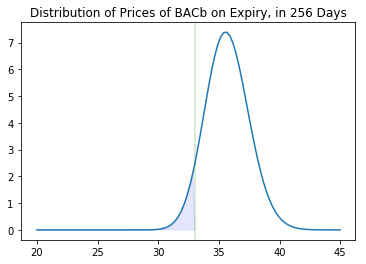

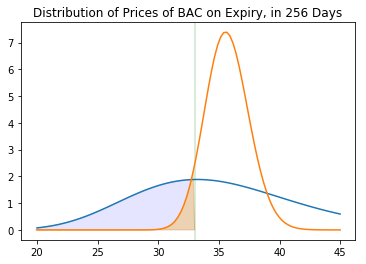

[58.08846115435135, 37.44186933801414, 1.2103443101785203] 2.569992515814155


In [5]:
#Future Stock Prices:

import pylab as p
import os
import contextlib
    
def option_shading(option, prices = None, shading = True, option2 = None, print_exp = False):
    "Given an option plot the pay off region for the asset on expiry"
    n = option.lifetime
    lognorm_scale = np.exp(option.asset.ret_dist.kwds['loc']*n)
    lognorm_shape = option.asset.ret_dist.kwds['scale']*(n**0.5)#takes SD
    p0 = option.asset.price0
    total_ret_dist = lognorm(loc = 0, s = lognorm_shape, scale = lognorm_scale)
    if prices is not None:
        price_idx = prices
    else:
        price_idx = np.linspace(p0*max(0,lognorm_scale - 3*lognorm_shape), p0*(lognorm_scale + 3*lognorm_shape), 1000)
    plt.plot(price_idx, total_ret_dist.pdf(price_idx/p0))
#     plt.plot(p0*total_ret_dist.expect(),0, 'ro')#dot at expected value of stock
    plt.title(f"Distribution of Prices of {option.asset.name} on Expiry, in {n} Days")
    plt.axvline(option.strike, color = 'g', alpha = 0.2)
    if option2:
        n2 = option2.lifetime
        lognorm_scale2 = np.exp(option2.asset.ret_dist.kwds['loc']*n2)
        lognorm_shape2 = option2.asset.ret_dist.kwds['scale']*(n2**0.5)#takes SD
        p0_2 = option2.asset.price0
        total_ret_dist2 = lognorm(loc = 0, s = lognorm_shape2, scale = lognorm_scale2)        
        plt.plot(price_idx, total_ret_dist2.pdf(price_idx/p0_2))
    
    if shading:
        #*Note*: EV is still not the option value(but diverges more than expected)
        if option.tp == "put":
            strike_idx = np.concatenate(([price_idx[0] - 0.1], price_idx[price_idx < option.strike], [option.strike]))
        else:
            strike_idx = np.concatenate(([option.strike], price_idx[option.strike < price_idx], [price_idx[-1] + 0.1]))
        p_strike = np.concatenate(([0], total_ret_dist.pdf(strike_idx[1:-1]/p0), [0]))
        p.fill(strike_idx, p_strike, alpha = 0.1, color = 'b')
        if option2 is not None:
            if option2.tp == "put":
                strike_idx2 = np.concatenate(([price_idx[0] - 0.1], 
                                              price_idx[price_idx < option.strike], 
                                              [option2.strike]))
            else:
                strike_idx2 = np.concatenate(([option2.strike],
                                              price_idx[option2.strike < price_idx], 
                                              [price_idx[-1] + 0.1]))
            p_strike2 = np.concatenate(([0], total_ret_dist2.pdf(strike_idx2[1:-1]/p0_2), [0]))
            p.fill(strike_idx2, p_strike2, alpha = 0.3, color = 'Orange')
    if print_exp: 
        if option.tp == "put":
            print(f"Expected Value of Stock 1: {p0*total_ret_dist.expect()}\n",
                    "Expected Value of 'Option' at Expiry is: ", 
                      total_ret_dist.expect(func = lambda i: option.strike - i*p0, 
                                        ub = option.strike/p0))
        else:
            print(f"Expected Value of Stock 1: {p0*total_ret_dist.expect()}\n",
                    "Expected Value of 'Option' at Expiry is: ", 
                      total_ret_dist.expect(func = lambda i: i*p0 - option.strike, 
                                        lb = option.strike/p0))
        if option2 is not None:
            if option2.tp == "put":
                        print(f"Expected Value of Stock 2: {p0_2*total_ret_dist2.expect()}\n",
                            "Expected Value of 'Option' at Expiry is: ", 
                              total_ret_dist.expect(func = lambda i: option2.strike - i*p0_2, 
                                                ub = option2.strike/p0_2))
            else:
                print(f"Expected Value of Stock 2: {p0_2*total_ret_dist2.expect()}\n",
                        "Expected Value of 'Option' at Expiry is: ", 
                          total_ret_dist2.expect(func = lambda i: i*p0_2 - option2.strike, 
                                            lb = option2.strike/p0_2))
    plt.show()#Comment, uncomment this line, grib!!
    
baml = Stock(price0 = 32, exp_vol = 0.2, name = "BAC")
baml_b = Stock(price0 = 33, exp_vol = 0.05, name = "BACb")
tesla = Stock(price0 = 325, exp_vol = 0.497, name = "TSLA")

call1 = Euro_Option(strike = 350, premium = 10, lifetime = 256, tp = 'call', asset = tesla)
call2 = Euro_Option(strike = 350, premium = 10, lifetime = 128, tp = 'call', asset = tesla)
call3 = Euro_Option(strike = 350, premium = 10, lifetime = 4, tp = 'call', asset = tesla)#doesn't match true prices

put1 = Euro_Option(strike = 33, premium = 10, lifetime = 256, tp = 'put', asset = baml)
put1b = Euro_Option(strike = 33, premium = 10, lifetime = 256, tp = 'put', asset = baml_b)

# option_shading(call1, prices = np.linspace(0,1000, 10000))
# option_shading(call2, prices = np.linspace(0,1000, 10000))
# option_shading(call3, prices = np.linspace(0,1000, 10000))
option_shading(put1, prices = np.linspace(20,45,100))
option_shading(put1b, prices = np.linspace(20,45,100))
option_shading(put1, option2 = put1b, prices = np.linspace(20,45,100), print_exp = False)

print([op.calc_value(tesla.price0) for op in [call1, call2, call3]], 
      put1.calc_value(baml.price0))

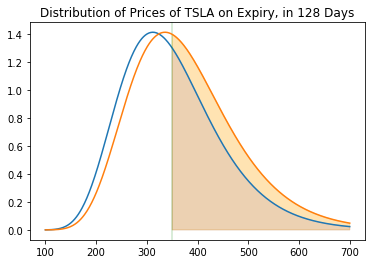

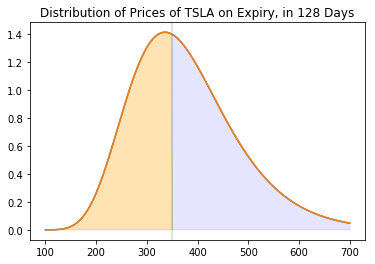

{'Delta': 0.5683325887253898, 'Gamma': 0.0006316544506578156, 'Vega': 15.470447405008573, 'Theta': -0.23659315635184092, 'Rho': 2.012566651861952}


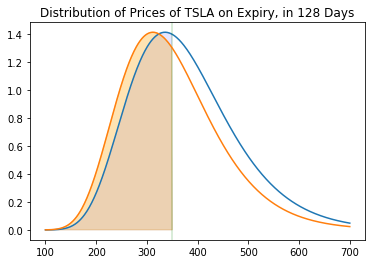


Delta In-the-Money


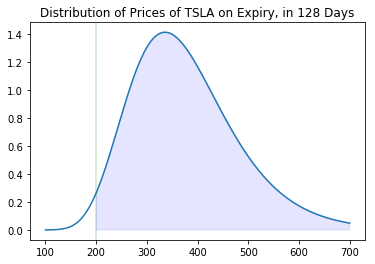

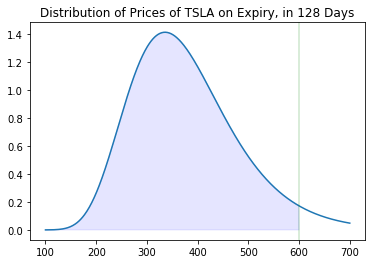


Delta out of the money


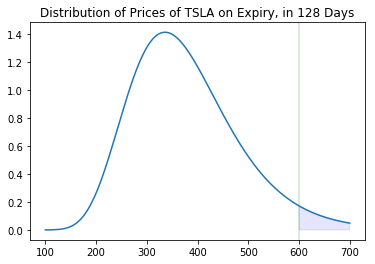

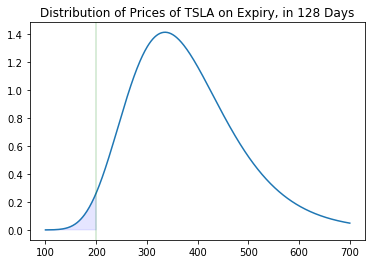

In [6]:
#Delta Intuition
tesla = Stock(price0 = 325, exp_vol = 0.4, name = "TSLA")
call1 = Euro_Option(strike = 350, premium = 10, lifetime = 128, tp = 'call', asset = tesla)
tesla_p = Stock(price0 = 350, exp_vol = 0.4, name = "TSLA")
call2 = Euro_Option(strike = 350, premium = 10, lifetime = 128, tp = 'call', asset = tesla_p)
#Shows change in distribution
option_shading(call1, prices = np.linspace(100, 700, 500), option2 = call2)

#Shows delta < 1
put2 = Euro_Option(strike = 350, premium = 10, lifetime = 128, tp = 'put', asset = tesla_p)
option_shading(call2, prices = np.linspace(100, 700, 500), option2 = put2, print_exp = False)
print(call2.calc_greeks())

#Put Intuition
put1 = Euro_Option(strike = 350, premium = 10, lifetime = 128, tp = 'put', asset = tesla)
option_shading(put2, prices = np.linspace(100, 700, 500), option2 = put1)#but delta < 1

print("\nDelta In-the-Money")
call3 = Euro_Option(strike = 200, premium = 10, lifetime = 128, tp = 'call', asset = tesla_p)
option_shading(call3, prices = np.linspace(100, 700, 500))
put4 = Euro_Option(strike = 600, premium = 10, lifetime = 128, tp = 'put', asset = tesla_p)
option_shading(put4, prices = np.linspace(100, 700, 500))
# option_shading(call3, prices = np.linspace(100, 700, 500))

print("\nDelta out of the money")
call4 = Euro_Option(strike = 600, premium = 10, lifetime = 128, tp = 'call', asset = tesla_p)
option_shading(call4, prices = np.linspace(100, 700, 500))
put3 = Euro_Option(strike = 200, premium = 10, lifetime = 128, tp = 'put', asset = tesla_p)
option_shading(put3, prices = np.linspace(100, 700, 500))
# option_shading(call4, prices = np.linspace(100, 700, 500))


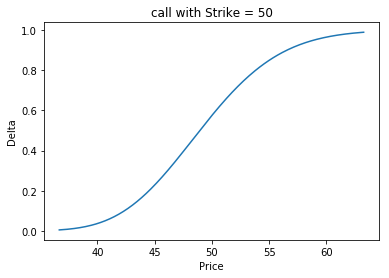

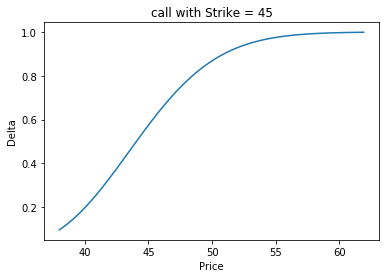

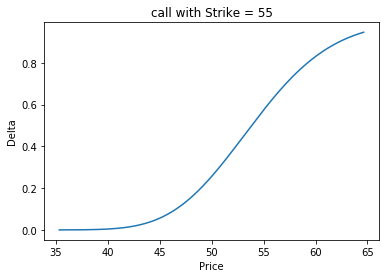

In [22]:
#Call Delta
call1 = Euro_Option(strike = 50, premium = 10, lifetime = 128, tp = 'call')
a = Euro_Option.plot_greek(call1, x_axis = 'Price')
a.show()
call1.strike = 45
a = Euro_Option.plot_greek(call1, x_axis = 'Price')
a.show()
call1.strike = 55
a = Euro_Option.plot_greek(call1, x_axis = 'Price')
a.show()
# print(call1.strike, call1.asset.true_prices)

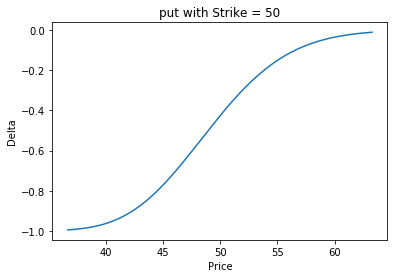

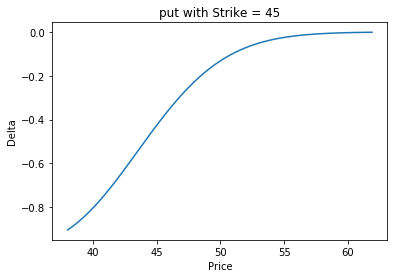

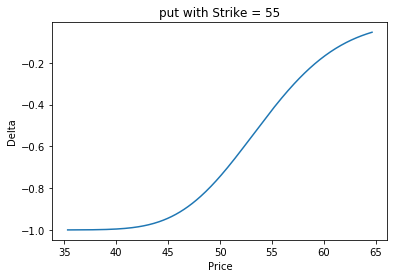

In [8]:
#Put Delta
put1 = Euro_Option(strike = 50, premium = 10, lifetime = 128, tp = 'put')
a = Euro_Option.plot_greek(put1, x_axis = 'Price')
a.show()
put1.strike = 45
a = Euro_Option.plot_greek(put1, x_axis = 'Price')
a.show()
put1.strike = 55
a = Euro_Option.plot_greek(put1, x_axis = 'Price')
a.show()
# print(put1.strike, put1.asset.true_prices)

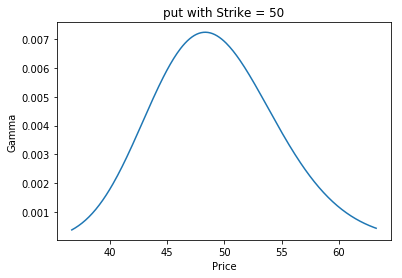

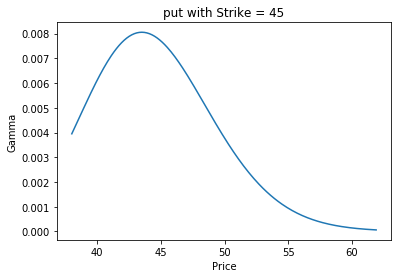

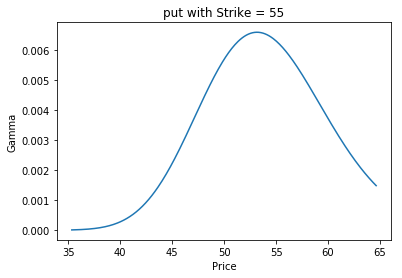

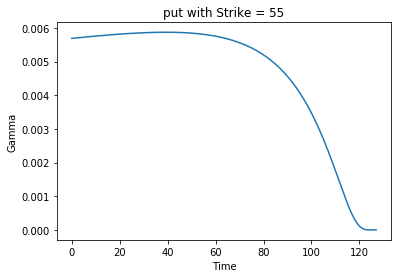

In [9]:
#Call Gamma
call1.strike = 50
a = Euro_Option.plot_greek(call1, greek='Gamma', x_axis = 'Price')
a.show()
call1.strike = 45
a = Euro_Option.plot_greek(call1, greek='Gamma',x_axis = 'Price')
a.show()
call1.strike = 55
a = Euro_Option.plot_greek(call1,greek='Gamma', x_axis = 'Price')
a.show()
b = Euro_Option.plot_greek(call1,greek='Gamma', x_axis = 'Time')
b.show()

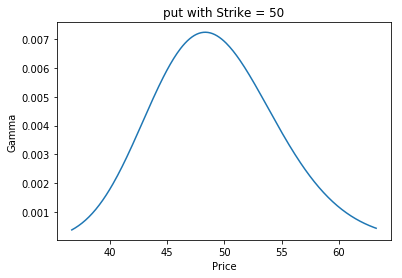

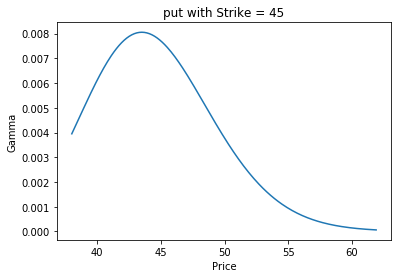

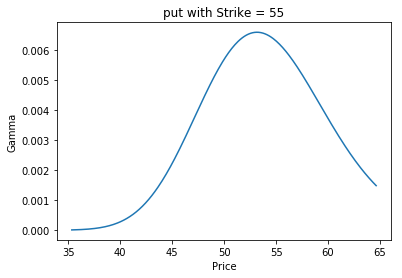

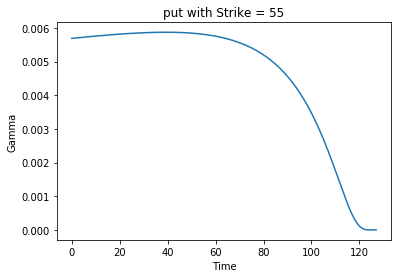

In [10]:
#Put Gamma
put1 = Euro_Option(strike = 50, premium = 10, lifetime = 128, tp = 'put')
a = Euro_Option.plot_greek(put1, greek='Gamma',x_axis = 'Price')
a.show()
put1.strike = 45
a = Euro_Option.plot_greek(put1, greek='Gamma', x_axis = 'Price')
a.show()
put1.strike = 55
a = Euro_Option.plot_greek(put1, greek='Gamma', x_axis = 'Price')
a.show()
b = Euro_Option.plot_greek(put1,greek='Gamma', x_axis = 'Time')
b.show()


 Vega when In-the-Money


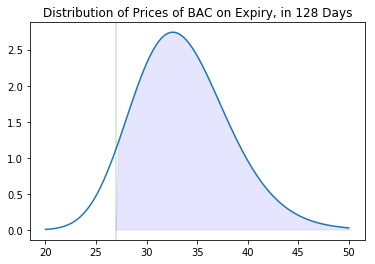

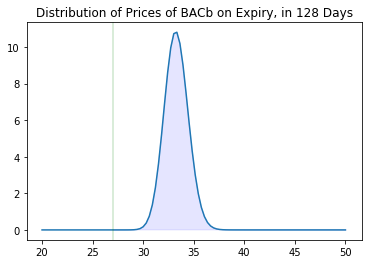


 Vega when Out of the money


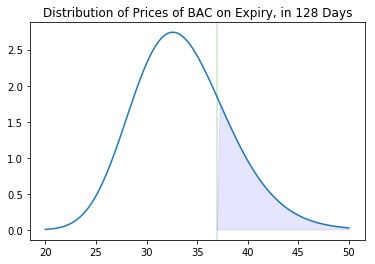

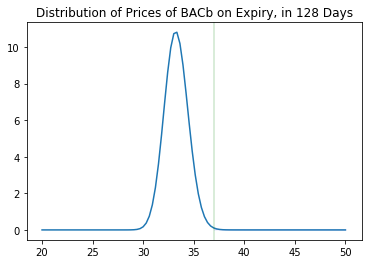


 Vega when at the money


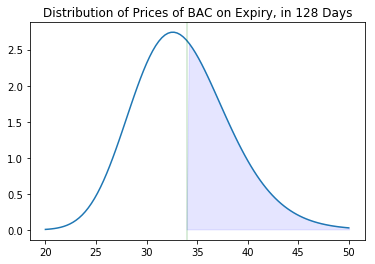

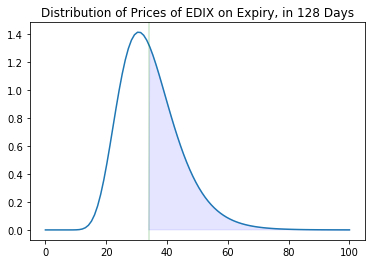

In [11]:
#Vega Intuition
baml = Stock(price0 = 32, exp_vol = 0.2, name = "BAC")
baml_b = Stock(price0 = 32, exp_vol = 0.05, name = "BACb")
risky = Stock(price0 = 32, exp_vol = 0.4, name = "EDIX")

print("\n Vega when In-the-Money")
#When in the money, the vega of an option is lower
call5 = Euro_Option(strike = 27, premium = 10, lifetime = 128, tp = 'call', asset = baml)
call6 = Euro_Option(strike = 27, premium = 10, lifetime = 128, tp = 'call', asset = baml_b)
option_shading(call5, prices = np.linspace(20, 50, 100))
# option_shading(call6, prices = np.linspace(20, 50, 100), option2 =call5)#vega increases
option_shading(call6, prices = np.linspace(20, 50, 100))

print("\n Vega when Out of the money")
#When Near the money, vega higher
call5.strike = 37#out
call6.strike = 37
option_shading(call5, prices = np.linspace(20, 50, 100))
option_shading(call6, prices = np.linspace(20, 50, 100))

print("\n Vega when at the money")
call5.strike = 34#near
option_shading(call5, prices = np.linspace(20, 50, 100))
call7 = Euro_Option(strike = 34, premium = 10, lifetime = 128, tp = 'call', asset = risky)
option_shading(call7, prices = np.linspace(0, 100, 100))


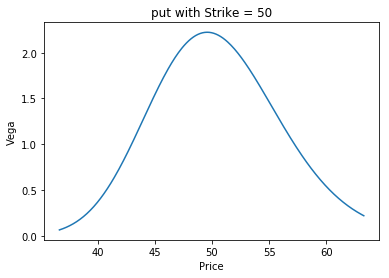

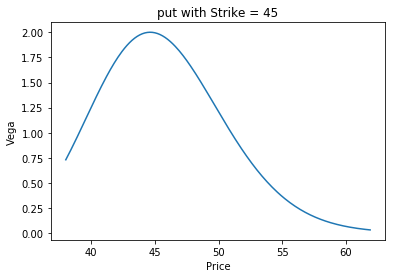

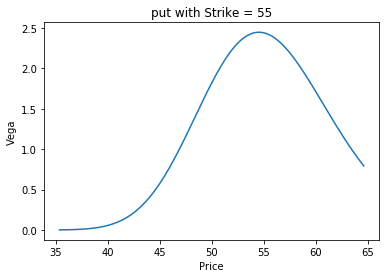

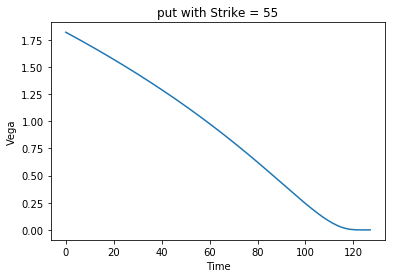

In [12]:
#Call Vega
call1.strike = 50
a = Euro_Option.plot_greek(call1, greek='Vega', x_axis = 'Price')
a.show()
call1.strike = 45
a = Euro_Option.plot_greek(call1, greek='Vega',x_axis = 'Price')
a.show()
call1.strike = 55
a = Euro_Option.plot_greek(call1,greek='Vega', x_axis = 'Price')
a.show()
b = Euro_Option.plot_greek(call1,greek='Vega', x_axis = 'Time')
b.show()

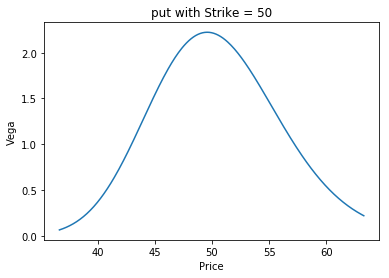

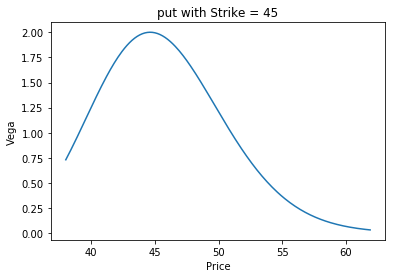

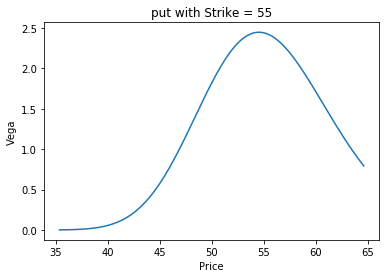

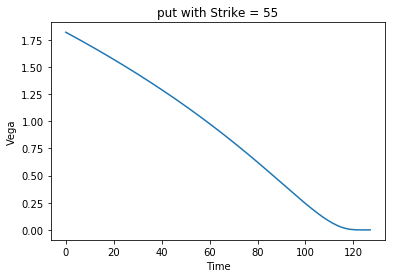

In [13]:
#Put Vega
put1 = Euro_Option(strike = 50, premium = 10, lifetime = 128, tp = 'put')
a = Euro_Option.plot_greek(put1, greek='Vega',x_axis = 'Price')
a.show()
put1.strike = 45
a = Euro_Option.plot_greek(put1, greek='Vega', x_axis = 'Price')
a.show()
put1.strike = 55
a = Euro_Option.plot_greek(put1, greek='Vega', x_axis = 'Price')
a.show()
b = Euro_Option.plot_greek(put1,greek='Vega', x_axis = 'Time')
b.show()

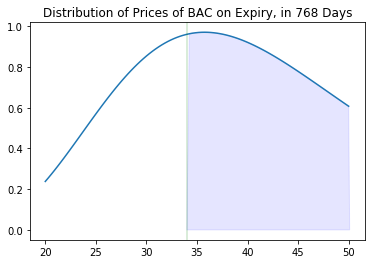

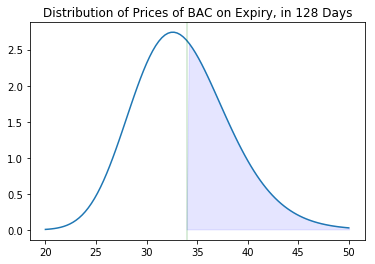

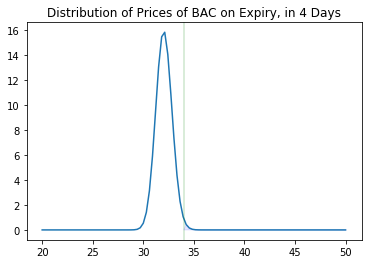

In [14]:
#Theta Intutition: Inverse of Vega but with more Time to grow. Less chance to realize Vol.
call5.lifetime = 768#3 years
option_shading(call5, prices = np.linspace(20, 50, 100))
call5.lifetime = 128#1/2 year
option_shading(call5, prices = np.linspace(20, 50, 100))
call5.lifetime = 4#1/2 year
option_shading(call5, prices = np.linspace(20, 50, 100))

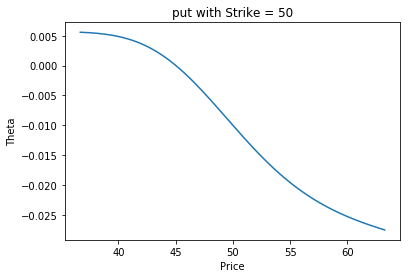

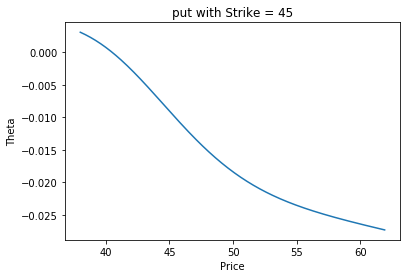

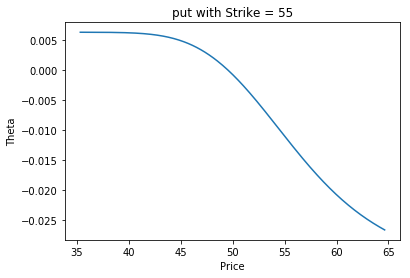

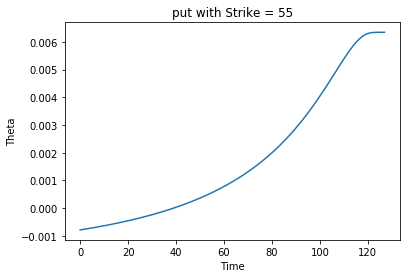

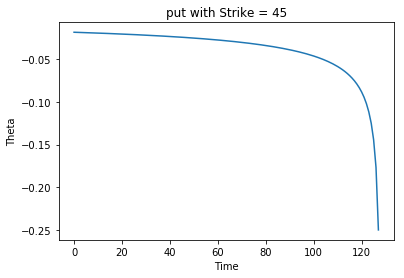

In [15]:
#Call Theta
call1.strike = 50
a = Euro_Option.plot_greek(call1, greek='Theta', x_axis = 'Price')
a.show()
call1.strike = 45
a = Euro_Option.plot_greek(call1, greek='Theta',x_axis = 'Price')
a.show()
call1.strike = 55
a = Euro_Option.plot_greek(call1,greek='Theta', x_axis = 'Price')
a.show()
b = Euro_Option.plot_greek(call1,greek='Theta', x_axis = 'Time')
b.show()
call1.strike = 45
b = Euro_Option.plot_greek(call1,greek='Theta', x_axis = 'Time')
b.show()

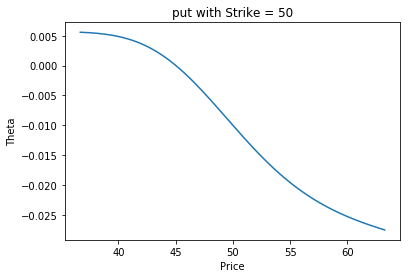

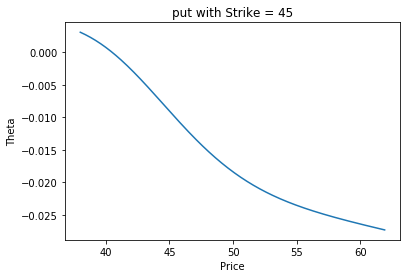

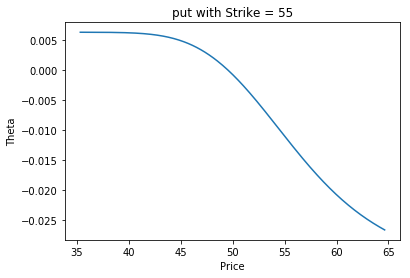

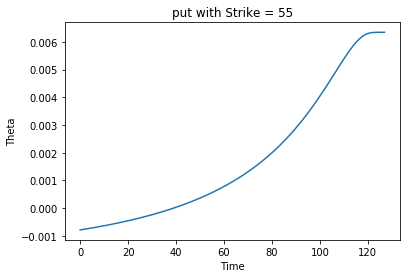

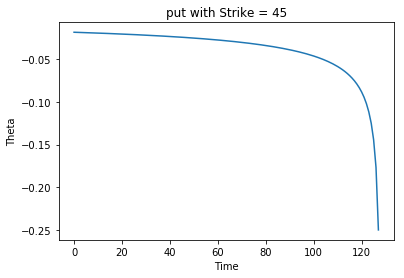

In [16]:
#Put Theta
put1 = Euro_Option(strike = 50, premium = 10, lifetime = 128, tp = 'put')
a = Euro_Option.plot_greek(put1, greek='Theta',x_axis = 'Price')
a.show()
put1.strike = 45
a = Euro_Option.plot_greek(put1, greek='Theta', x_axis = 'Price')
a.show()
put1.strike = 55
a = Euro_Option.plot_greek(put1, greek='Theta', x_axis = 'Price')
a.show()
b = Euro_Option.plot_greek(put1, greek='Theta', x_axis = 'Time')
b.show()
put1.strike = 45
b = Euro_Option.plot_greek(put1, greek='Theta', x_axis = 'Time')
b.show()

# Value = Time Value + Instrinsic Value
There's 2 components of option value, the Instrinsic value(Value if excersised today) and Time Value(Value it might go up).

Theta is the decrease in Timve Value

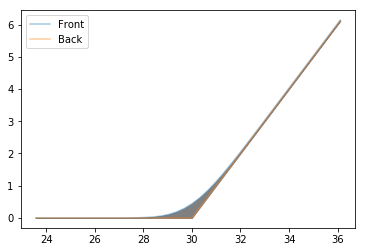

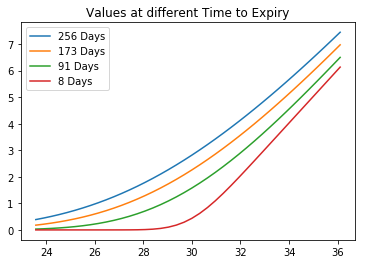

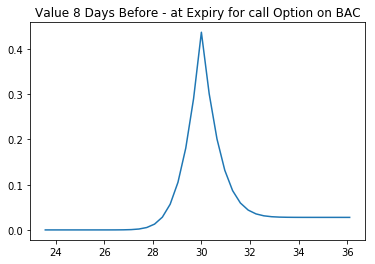

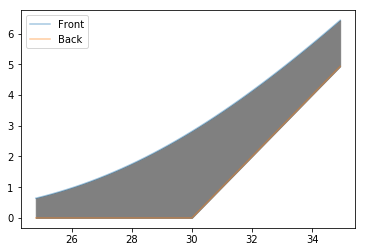

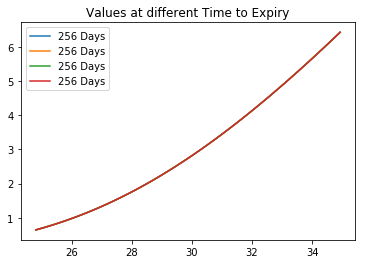

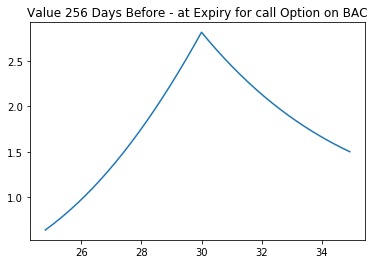

In [17]:
def plot_time_val(option, x_axis = None, t= 0):
    "Plot Differnce in value at Present vs. Expiry"
    vol = option.asset.exp_vol
    scale = vol*option.asset.true_prices[t] or 10#sets as 2SD for year
    x_axis = x_axis or np.arange(option.strike - scale, option.strike + scale, scale/20)
    val = [option.calc_value(spot = i, days_elapsed=option.lifetime - t)  for i in x_axis]
    intrinsic = [option.calc_value(spot = i, days_elapsed=option.lifetime) for i in x_axis]
    time_val = [i-j for i,j in zip(val, intrinsic)]
    plt.plot(x_axis, val, alpha = 0.4)
    plt.plot(x_axis, intrinsic, alpha = 0.4)
    plt.fill_between(x_axis, intrinsic, val, color = 'grey')
    plt.legend(("Front", "Back"))
    plt.show()
    plt.title("Values at different Time to Expiry")
#     plt.legend([for i in np.linspace(0, option.lifetime - t, 4)])
    for e in np.linspace(0, option.lifetime - t, 4):
        val = [option.calc_value(spot = i, days_elapsed=e)  for i in x_axis]
        plt.plot(x_axis, val, label = f"{option.lifetime - e:.0f} Days" )
    plt.legend()
    plt.show()
    plt.plot(x_axis, time_val)
    plt.title(f"Value {t} Days Before - at Expiry for {option.tp} Option on {option.asset.name}")
    plt.show()
    
    
call_option = Euro_Option(strike = 30, premium = 0, lifetime = 256, tp = 'call', asset = baml)
put_option = Euro_Option(strike = 30, premium = 0, lifetime = 256, tp = 'put', asset = baml)
for o in [call_option]:#, put_option]:
    for t in [8, 256]:
        plot_time_val(o, t= t)

# Hedging
Greeks are additive: if have a position with a delta of 0.8, vega of 0.5 and theta of 0.1, and the price goes up by 1/2 a dollar tommorow, but the implied vol drops by 2pts then what's the change in position?  0.8 \* 0.5 -0.5\*2+0.1\*1 = \$ 0.5 dollars.

NameError: name 'price0' is not defined

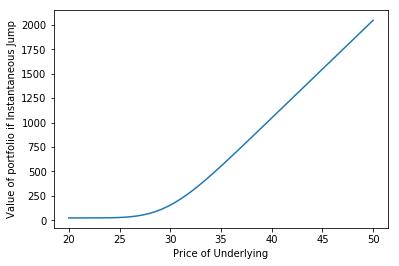

In [325]:
def option_stock_graph(option, stock, position = 100, price0 = 25, x_axis = np.linspace(15,50), 
                       days_elapsed = 0, zero_line = False, tangent = False, seperate = False, show =True, offset = 0):
    d_hedge = option.calc_greeks(spot = price0, days_elapsed = days_elapsed)['Delta']
    instr = [option, stock]
    weights = [position, -position*d_hedge]
    kwarg_lst = [{'days_elapsed': days_elapsed}, {'spot':price0}]
    if seperate:
        for i,j,k in zip(instr, weights, kwarg_lst):
            comp_offset = portfolio_value([i], [j], [dict(k, spot= price0)])
            plot_port_payoff([i],[j],[k], x_axis, tangent = tangent, offset = comp_offset)
            plt.title("Components")
            plt.show()
    comp_offset = portfolio_value([i], [j], [dict(k, spot= price0)])
    plot_port_payoff(instr, weights, kwarg_lst, x_axis, 
                     tangent = tangent, zero_line = zero_line, offset = offset)
    plt.title(f"Payoff of Hedged portfolio of {position} Options on {stock.name}")
    if show:
        plt.show()
    
p0 = baml.price0    
call_option = Euro_Option(strike = 30, premium = 0, lifetime = 128, tp = 'call', asset = baml)
put_option = Euro_Option(strike = 30, premium = 0, lifetime = 128, tp = 'put', asset = baml)
x_axis = np.linspace(20,50)

#First 2 are long, 2nd 2 are Short
option_stock_graph(call_option, baml, tangent = True, x_axis = x_axis, price0 =p0-5,days_elapsed = 64, seperate = True)
# option_stock_graph(put_option, baml, tangent = True, x_axis = x_axis, price0 =p0)
# option_stock_graph(call_option, baml, position = -100,  tangent = True, x_axis = x_axis, price0 =p0)
# option_stock_graph(put_option, baml, position = -100, days_elapsed = 100, tangent = True, x_axis = x_axis, price0 =p0)



Option Vol is underestimatted, BUY
Option Value:  383.7690051615267
Initial Portfolio Value: -1511.8026213258504 [100, -55.75210666139344]
Theta Bill, value change due to passage of time: -22.16328149019023
Gamma Scalping return: Gain from prices changing Instantly:  205.54010783196168
Total Return since previous:  183.37682634177145


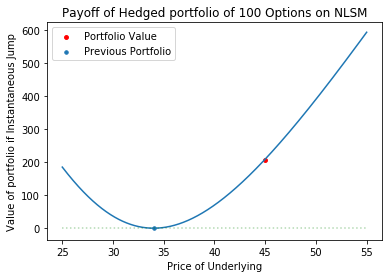

New Portfolio Value:  -2791.436522525935 profit 183.37682634177168 [100, -88.26345616232358] 

Theta Bill, value change due to passage of time: -16.865861735317594
Gamma Scalping return: Gain from prices changing Instantly:  142.5830121300487
Total Return since previous:  125.7171503947311


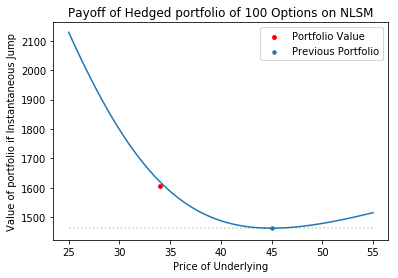

New Portfolio Value:  -1535.6786678319825 profit 125.7171503947311 [100, -55.026964859405304] 

Theta Bill, value change due to passage of time: -28.656886507725403
Gamma Scalping return: Gain from prices changing Instantly:  235.18110382835948
Total Return since previous:  206.52421732063408


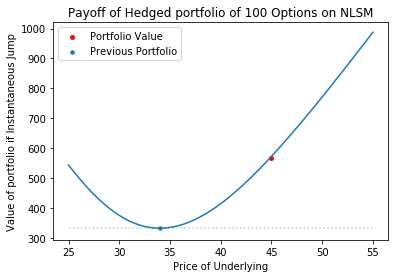

New Portfolio Value:  -2959.4840995170334 profit 206.52421732063453 [100, -91.2565126150872] 

Theta Bill, value change due to passage of time: -15.658305648499663
Gamma Scalping return: Gain from prices changing Instantly:  147.3437854606059
Total Return since previous:  131.68547981210622


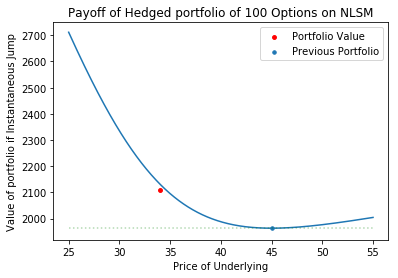

New Portfolio Value:  -1565.323010060729 profit 131.68547981210577 [100, -54.124877037316665] 

Theta Bill, value change due to passage of time: -35.845201700752796
Gamma Scalping return: Gain from prices changing Instantly:  282.94921644818874
Total Return since previous:  247.10401474743594


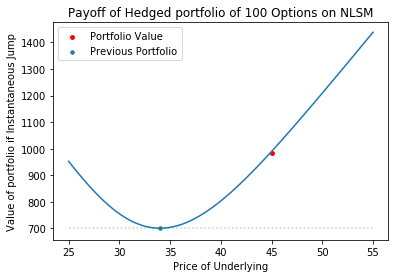

New Portfolio Value:  -3174.3524560835776 profit 247.10401474743594 [100, -95.37228727665632] 

Theta Bill, value change due to passage of time: -10.88407127663504
Gamma Scalping return: Gain from prices changing Instantly:  139.3571063295326
Total Return since previous:  128.47303505289756


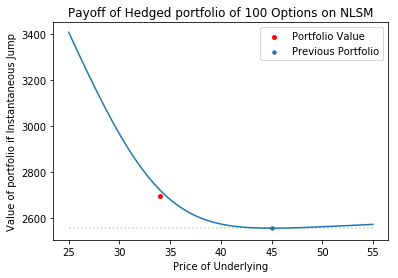

New Portfolio Value:  -1603.6800065652887 profit 128.47303505289756 [100, -52.95465743943893] 

Theta Bill, value change due to passage of time: -54.37571787428806
Gamma Scalping return: Gain from prices changing Instantly:  376.001058945762
Total Return since previous:  321.62534107147394


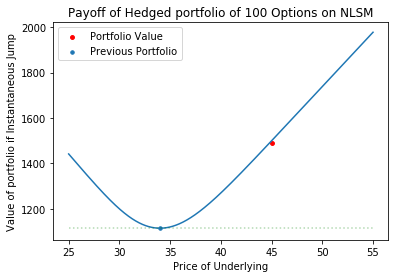

New Portfolio Value:  -3384.6808712255215 profit 321.62534107147394 [100, -99.67968423347686] 

Total Hedging Return:  532.5833543609228
Option Vol is overestimated, SELL


In [320]:
@no_print
def hedge_ex(option, x_axis):
    "Plots an Example hedging"
    prev = option.asset.true_prices[0]
    print("Option Value: ", 100*option.calc_value(spot = prev))
    instr = [option, stock_ex]
    d_hedge = option.calc_greeks(spot = prev, days_elapsed = 0)['Delta']
    initial_hedge = prev*d_hedge*100
    cum_hedge_costs =initial_hedge
    weights = [100, -100*d_hedge]
    kwarg_lst = [{'days_elapsed': 0, 'spot':prev}, {'spot':prev}]
    prev_value = portfolio_value(instr, weights, kwarg_lst)
    print("Initial Portfolio Value:", prev_value, weights)
    gamma_sum = 0
    theta_sum = 0
    for e, p in enumerate(option.asset.true_prices[1:]):
        #Hedged at previous prices, make profit from that change
        e += 1
        #Theta bill: change between previous and now, assuming prices constant at last
        kwarg_lst = [{'days_elapsed': e, 'spot':prev}, {'spot':prev}]
        value = portfolio_value(instr, weights, kwarg_lst)#value of portfolio today if stock didn't move
        print("Theta Bill, value change due to passage of time:", value - prev_value)
        theta_sum += value - prev_value

        #Gamma Scalping: Return from stock price changing, 'instantaneously' today
        kwarg_lst = [{'days_elapsed': e, 'spot':p}, {'spot':p}]
        current_value = portfolio_value(instr, weights, kwarg_lst)#current value of the portfolio
        print("Gamma Scalping return: Gain from prices changing Instantly: ", current_value - value)
        gamma_sum += current_value - value
        print("Total Return since previous: ", current_value - prev_value)
        offset = cum_hedge_costs - initial_hedge#plot changes in price of total portfolio, this is likely incorrect
        option_stock_graph(option, stock_ex, price0 = prev, x_axis = x_axis, days_elapsed = e, 
                           zero_line = True, seperate = False, show = False,
                           offset = offset)#portfolion at last iteration's price
#         plot_port_payoff(instr, weights, kwarg_lst, x_axis, price0 = prev, zero_line = True)
    
        plt.scatter(p, offset + current_value - value, color = 'r', s=15, label='Portfolio Value')#point of current value
        plt.scatter(prev, offset, facecolors = None, s=12, label='Previous Portfolio')#point of current value
        plt.legend()
        plt.show()

        #Update Portfolio Value for instantaneous Change
        d_hedge = option.calc_greeks(spot = p, days_elapsed = e)['Delta']
        share_change = weights[1] + 100*d_hedge#shares of stock traded to re-hedge portfolio
        hedge_costs = p*share_change#if cash is opposite of shares
    #     print(f'hc: {hedge_costs}')
        cum_hedge_costs += hedge_costs
        weights = [100, -100*d_hedge]
        kwarg_lst = [{'days_elapsed': e, 'spot':p}, {'spot':p}]
        rehedged_value = portfolio_value(instr, weights, kwarg_lst)#ignores interest
    #     rehedged_value += hedge_costs
    #     print(f"chc:{cum_hedge_costs}")
        print("New Portfolio Value: ", rehedged_value, "profit", hedge_costs + rehedged_value - prev_value, weights, "\n")
        prev = p
        prev_value = rehedged_value

    #rehedged_value is value of ending portfolio, need to exit stock position + option excersised or not
    print("Total Hedging Return: ", cum_hedge_costs + rehedged_value - 100*option.calc_value(spot = prev))
    #print(gamma_sum + theta_sum - 100*option.calc_value(spot = prev))# Should this add up?
    return None
  
days = 8
ex_price = np.array([34,45]*4)
prev = ex_price[0]
exp_dvol = 0.1
# #Issue with below is that are pricing based on vol in terms of total return, not the volatility of atual prices. 
# #That wasn't it, fix
# ex_rets = [j/i for i,j in zip(ex_price[:-1], ex_price[1:])]
# exp_dvol = np.std(ex_rets)/(days)**0.5 


stock_ex = Stock(prices = ex_price, exp_dvol = exp_dvol, exp_ret = 0)
call_option = Euro_Option(strike = prev, premium = 0, lifetime = days, tp = 'call', asset = stock_ex)
x_axis =  np.linspace(25, 55, 1000)
print("Option Vol is underestimatted, BUY")#Make more in gamma than pay in theta
hedge_ex(call_option, x_axis, no_printing = False)

print("Option Vol is overestimated, SELL")#Pay more in theta than get in gamma
stock_ex.exp_dvol = 2*np.std(ex_price)/days**0.5
# hedge_ex(call_option, x_axis, no_printing = True)
# #The reason that this alternates between being high and low is
# #that the daily vol is a above/below the average(since vol is based on total returns and 45/35 as change in ratios 35/45 


# Types of Spreads

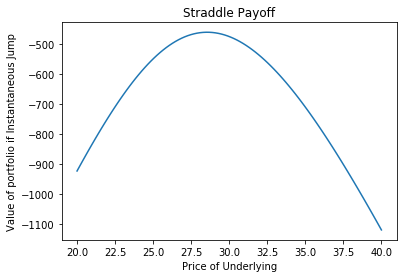

0.9936276266318687 {'Delta': 0.9968138133159343, 'Gamma': 0.00010959903551388894, 'Vega': 0.07613711446697402, 'Theta': -0.022526957513792616, 'Rho': 0.7413540785562035} {'Delta': -0.0031861866840656727, 'Gamma': 0.00010959903551388894, 'Vega': 0.07613711446697402, 'Theta': -0.01916392631216059, 'Rho': -0.004276989404961609}


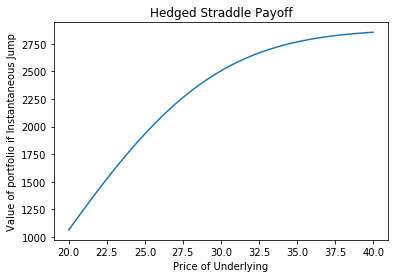

In [52]:
baml.strike = 30
option = Euro_Option(strike = 30, premium = 0, lifetime = 256, tp = 'call', asset = baml)
x_axis = np.linspace(20,40, 100)
sz = 100

def time_spread(t1=256, t2=128, strike = 30, days_elapsed =0, hedged = True, greeks = None):
    #Time spread: short prompt, long back
    option = Euro_Option(strike = strike, premium = 0, lifetime = t1, tp = 'call', asset = baml)
    option2 = Euro_Option(strike = strike, premium = 0, lifetime = t2, tp = 'call', asset = baml)
    plot_port_payoff([option, option2], 
                     [sz,-sz],
                     [{'days_elapsed':days_elapsed},{'days_elapsed':days_elapsed},{'spot':0}],
                     x_axis)
    plt.title("Time Spread")
    plt.show()
    if hedged:
        d_hedge = option.calc_greeks()['Delta']
        d_hedge -= option2.calc_greeks(days_elapsed=days_elapsed)['Delta']
        plot_port_payoff([option, option2, baml], 
                         [sz,-sz,d_hedge*sz], 
                         [{'days_elapsed':days_elapsed},{'days_elapsed':days_elapsed},{'spot':0}],
                         x_axis)
        plt.title("Hedged Time Spread Payoff")
        plt.show()
        val = [option.calc_value(spot = i, days_elapsed=days_elapsed)  for i in x_axis]
        val2 = [option2.calc_value(spot = i, days_elapsed=days_elapsed)  for i in x_axis]
        plt.plot(x_axis, val)
        plt.plot(x_axis, val2)
    #     plt.fill_between(x_axis, val, val2, color = 'grey')
        plt.legend(("Back", "Front"))
        plt.show()
# time_spread(days_elapsed=0)

#Stradle: Short Put and Call w/ same strike
def straddle(strike):
    #Note that this position is NOT delta nuetral if strike = spot as the stock is expected to grow. 
    #Based on expectations upon expiry call is slightly in the money.
    option = Euro_Option(strike = strike, premium = 0, lifetime = 256, tp = 'call', asset = baml)
    p_option = Euro_Option(strike = strike, premium = 0, lifetime = 256, tp = 'put', asset = baml)
   
    plot_port_payoff([option, p_option], [-sz,-sz], [{'days_elapsed':0},{'days_elapsed':0}], x_axis, tangent = False)
    plt.title("Straddle Payoff")
    plt.show()

    d_hedge = option.calc_greeks()['Delta']
    d_hedge += p_option.calc_greeks()['Delta']
    print(d_hedge, option.calc_greeks(), p_option.calc_greeks())#recalc put greeks
    plot_port_payoff([option, p_option, baml], [-sz, -sz, sz*d_hedge], [{'days_elapsed':0},{'days_elapsed':0},{'spot':0}], x_axis, tangent = False)
    plt.title("Hedged Straddle Payoff")
    plt.show()
straddle(30) 
# straddle(30*1.08) #fixes 'issue' with straddle

# d_hedge += option.calc_greeks(days_elapsed=250)['Delta']
# plot_port_payoff([option, option, stock], [sz0,sz0, -sz0*d_hedge], [{'days_elapsed':0},{'days_elapsed':250},{'spot':0}], x_axis)


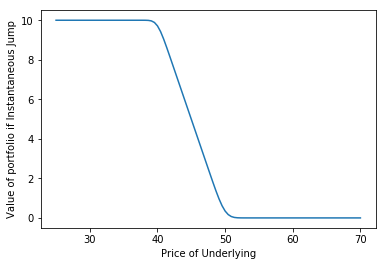

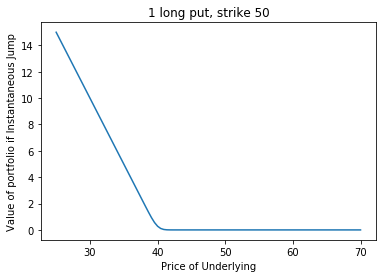

Text(0.5,1,'Short 1 puts, strike 40')

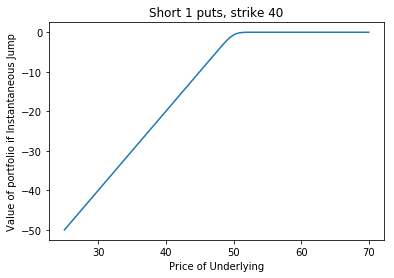

In [44]:
x_axis = np.linspace(25,70, 100)
call_option = Euro_Option(strike = 40, premium = 0, lifetime = 2, tp = 'put', asset = baml)
call2_option = Euro_Option(strike = 50, premium = 0, lifetime = 2, tp = 'put', asset = baml)
plot_port_payoff([call2_option, call_option], [1,-1], [], x_axis)
plt.show()
plot_port_payoff([call_option], [1], [], x_axis)
plt.title("1 long put, strike 50")
plt.show()
plot_port_payoff([call2_option], [-2], [], x_axis)
plt.title("Short 1 puts, strike 40")


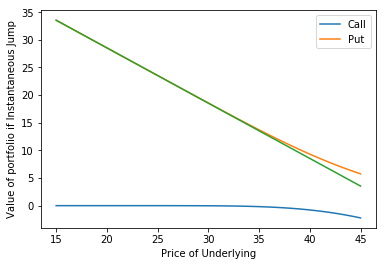

Text(0.5,1,'Short Call, Long Put')

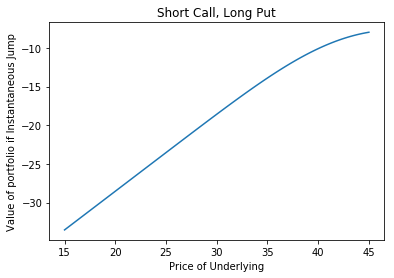

In [25]:
#Put call Parity
baml = Stock(price0 = 50, exp_vol = 0.2, name = "BAC")
x_axis = np.linspace(30,70, 100)
call_option = Euro_Option(strike = 50, premium = 0, lifetime = 256, tp = 'call', asset = baml)
call2_option = Euro_Option(strike = 60, premium = 0, lifetime = 256, tp = 'call', asset = baml)

put_option = Euro_Option(strike = 50, premium = 0, lifetime = 256, tp = 'put', asset = baml)
plot_port_payoff([call_option], [-1], [], x_axis)
plot_port_payoff([put_option], [1], [], x_axis)
plot_port_payoff([call_option, put_option], [-1,1], [], x_axis)
plt.legend(("Call", "Put"))
plt.show()
plot_port_payoff([call_option, put_option], [-1,-1], [], x_axis)
plt.title("Short Call, Long Put")
# plt.plot(x_axis, 32 - x_axis)

# Below will Plot the greeks or total value of a given portfolio with the  given weights, expiry

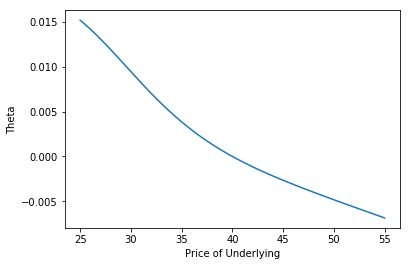

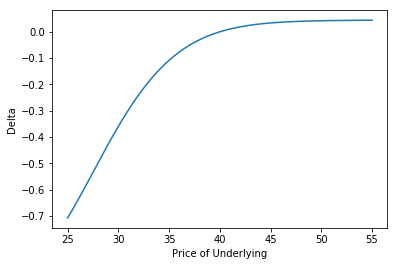

In [319]:
#Make Arbitrary Spread
p_option = Euro_Option(strike = 30, premium = 0, lifetime = 256, tp = 'put', asset = baml)
instr = [option , option , p_option, option, baml]
weights = [1, -1, 1, -1, 5]
kwarg_lst = [{'days_elapsed':0}, {'days_elapsed':9}, {'days_elapsed':7}, {'days_elapsed':5}]
plot_port_greek(instr, weights, kwarg_lst, x_axis, greek='Theta')
plt.show()
plot_port_greek(instr, weights, kwarg_lst,x_axis)

In [ ]:
#Optimal Gamma Scalping
def gamma_payoff(option, rule=0.1, reps_day=1000):
    """Return's the value of gamma scalping the option if hedge for a ratio change of more than rule.
    reps_day is how many iterations to simulate per day"""
    reps = option.lifetime*reps_day
    rep_vol = option.dvol/reps_day**0.5
    rep_ret = option.
    

In [ ]:











#Make animations
fig = plt.figure()
ax = plt.axes(xlim=(40, 60), ylim=(-10, 10))#sets limits
line, = ax.plot([], [], lw=2)


def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def anim_price(option, t, iv = None):
    "Animate the change in price of an option from issuance to expiry"
    spot = option.asset.true_prices[t]
    scale = 10#max(underlying_prx) - min(underlying_prx)
    stock_prices = np.arange(option.strike - scale, self.strike + scale, scale/20)
    y = [option.calc_value(i, days_elapsed=t, iv = iv) for i in stock_prices]
    print(stock_prices, y)
    line.set_data(stock_prices, y)
    return line,

animate = lambda i: anim_price(call2, i)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

#need to get saving working to display
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
plt.show()

1.0378153839595503 1.0392304845413265 0.281206338134709 0.28284271247461906


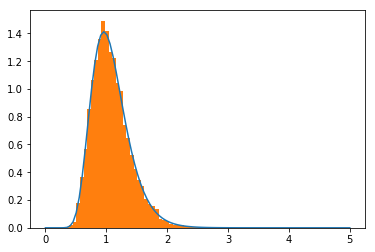

In [109]:
def plot_total_ret(option, price_idx = None):
    "Given an asset, plot the distribution of it's total returns"
    n = option.lifetime
    lognorm_scale = np.exp(option.asset.ret_dist.kwds['loc']*n)
    lognorm_shape = option.asset.ret_dist.kwds['scale']*(n**0.5)#takes SD
    p_0 = option.asset.price0
    total_ret_dist = lognorm(loc = 0, s = lognorm_shape, scale = lognorm_scale)
    if price_idx is None:
        price_idx =  np.linspace(p_0*max(0,lognorm_scale - 3*lognorm_shape), p_0*(lognorm_scale + 3*lognorm_shape), 1000)
    plt.plot(price_idx, total_ret_dist.pdf(price_idx))


##Show that distribution matches
option = Euro_Option(strike = 350, premium = 10, lifetime = 128, tp = 'call', asset = tesla)
n = option.lifetime
lognorm_scale = np.exp(option.asset.ret_dist.kwds['loc']*n)
lognorm_shape = option.asset.ret_dist.kwds['scale']*(n**0.5)#takes SD
p_0 = option.asset.price0

total_ret_dist = lognorm(loc = 0, s = lognorm_shape, scale = lognorm_scale)
price_idx = np.linspace(p_0*max(0,lognorm_scale - 3*lognorm_shape), p_0*(lognorm_scale + 3*lognorm_shape), 1000)
price_idx = np.linspace(0,5,100)
plt.plot(price_idx, total_ret_dist.pdf(price_idx))

s = 10000
samples = [0]*s
num_days = option.lifetime
for i in range(s):
    samples[i] = np.exp(np.cumsum(option.asset.ret_dist.rvs(num_days)))[-1]
shape, loc, scale = lognorm.fit(samples, floc = 0)
print(scale, lognorm_scale, shape, lognorm_shape)
plt.hist(samples, density = True, bins = 50)
plt.show()

In [ ]:
#ignore
market = Market(risk_free = 0.0)
tstock = Stock(market = market, exp_vol = 0.12, price0 = 52)
call2 = Euro_Option(strike = 50, lifetime = 8, asset = tstock)
call2.calc_value(spot=52, days_elapsed=0)


#Distribution of of future stock returns 
#Probability Distribution of Black-Scholes returns
from scipy.stats import lognorm, norm
# print(ret_dist.pdf(0.001), ret_dist.pdf(0.999), rets)
# logsample = ret_dist.rvs(size=1000) 
# sample = np.exp(logsample)
# shape, loc, scale = lognorm.fit(sample, floc=0)#holds loc to 0
# print(shape, scale)
# print(d_vol, np.exp(d_ret))


#shape = d_vol, scape = np.exp(Mu)
def plot_price_moves(d_ret = math.log(1 + 0.08)/256, d_vol = year_vol/math.sqrt(256), t = 256, x_axis = None):
    t_ret = d_ret*t
    t_vol = d_vol*(t**0.5)
#     print(t_ret, year_ret, t_vol, year_vol)
    price_dist = lognorm(loc = 0, scale = np.exp(t_ret), s = t_vol)
    if x_axis is not None:
        rets = x_axis
    else:
        rets = np.linspace(np.exp(t_ret)- 3*t_vol, np.exp(t_ret) + 3*t_vol, 100)
    plt.plot(rets, price_dist.pdf(rets))
    plt.title(f"Distribution of Prices after {t} Days")
    plt.show()
    return price_dist
# plot_price_moves(t=1, x_axis = np.linspace(0,2))
# plot_price_moves()

stock = Stock(price0 = 52, exp_vol = 0.12, dividend =0)
call1 = Euro_Option(strike = 50, premium = 10, lifetime = 128, tp = 'call')
# def shade_option_value(Option):
d_ret = np.log(1+0.08)/256
d_vol = 0.16/256**0.5
reps = 100
year_price = [0]*reps
for i in range(reps):
    n = 256*9
    t_ret = d_ret*n
    t_vol = d_vol*n**0.5
    ret_dist = norm(loc = d_ret, scale = d_vol)
    samples = ret_dist.rvs(n)
#     print("sm", np.cumsum(samples)[-1], np.sum(samples))
    prices = np.exp(np.cumsum(samples))
    year_price[i] = prices[-1]

#Mean and Variance don't match up??!?!, SD, Mean are above what is expected
print(np.std(year_price), d_vol*(n)**0.5, np.mean(year_price), np.exp(d_ret*n))
plt.hist(year_price, density = True)
price_dist = plot_price_moves(d_ret = d_ret, d_vol = d_vol, t = n, x_axis = np.linspace(0,10,1000))
